# 11. User Referral Program

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from platform import python_version
print(python_version())

3.6.10


In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px solid lightgray;
}

## Load Dataset


In [39]:
data  = pd.read_csv('E:/Collection_DS_takehome_challenges/Data/referral.csv', parse_dates=['date'])
data['date_only'] = data['date'].dt.date
data.head()

,user_id,date,country,money_spent,is_referral,device_id,date_only
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG,2015-10-03
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX,2015-10-03
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG,2015-10-03
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH,2015-10-03
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH,2015-10-03


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97341 entries, 0 to 97340
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      97341 non-null  int64         
 1   date         97341 non-null  datetime64[ns]
 2   country      97341 non-null  object        
 3   money_spent  97341 non-null  int64         
 4   is_referral  97341 non-null  int64         
 5   device_id    97341 non-null  object        
 6   date_only    97341 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 5.2+ MB


In [41]:
data.describe()

,user_id,money_spent,is_referral
count,97341.000000,97341.000000,97341.000000
mean,6354.801029,44.692360,0.287823
std,5682.991186,22.791839,0.452751
min,1.000000,10.000000,0.000000
25%,2020.000000,27.000000,0.000000
50%,4053.000000,42.000000,0.000000
75%,10286.000000,59.000000,1.000000
max,20000.000000,220.000000,1.000000


In [42]:
data.isnull().sum()

user_id        0
date           0
country        0
money_spent    0
is_referral    0
device_id      0
date_only      0
dtype: int64

In [43]:
print('Unique country:\t', len(data['country'].unique()),'\t' , list(data['country'].unique()))
print('Unique user id:\t', len(data['user_id'].unique()))
print('Unique device:\t', len(data['device_id'].unique()))

Unique country:	 9 	 ['FR', 'CA', 'UK', 'MX', 'DE', 'US', 'IT', 'ES', 'CH']
Unique user id:	 18809
Unique device:	 17887


## Data Processing

In [44]:
# extract date information
data['dayofweek'] = data['date'].apply(lambda x: x.dayofweek)
start_date = pd.to_datetime('2015-10-31')

In [45]:
data.head()

,user_id,date,country,money_spent,is_referral,device_id,date_only,dayofweek
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG,2015-10-03,5
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX,2015-10-03,5
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG,2015-10-03,5
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH,2015-10-03,5
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH,2015-10-03,5


## Data Visualization

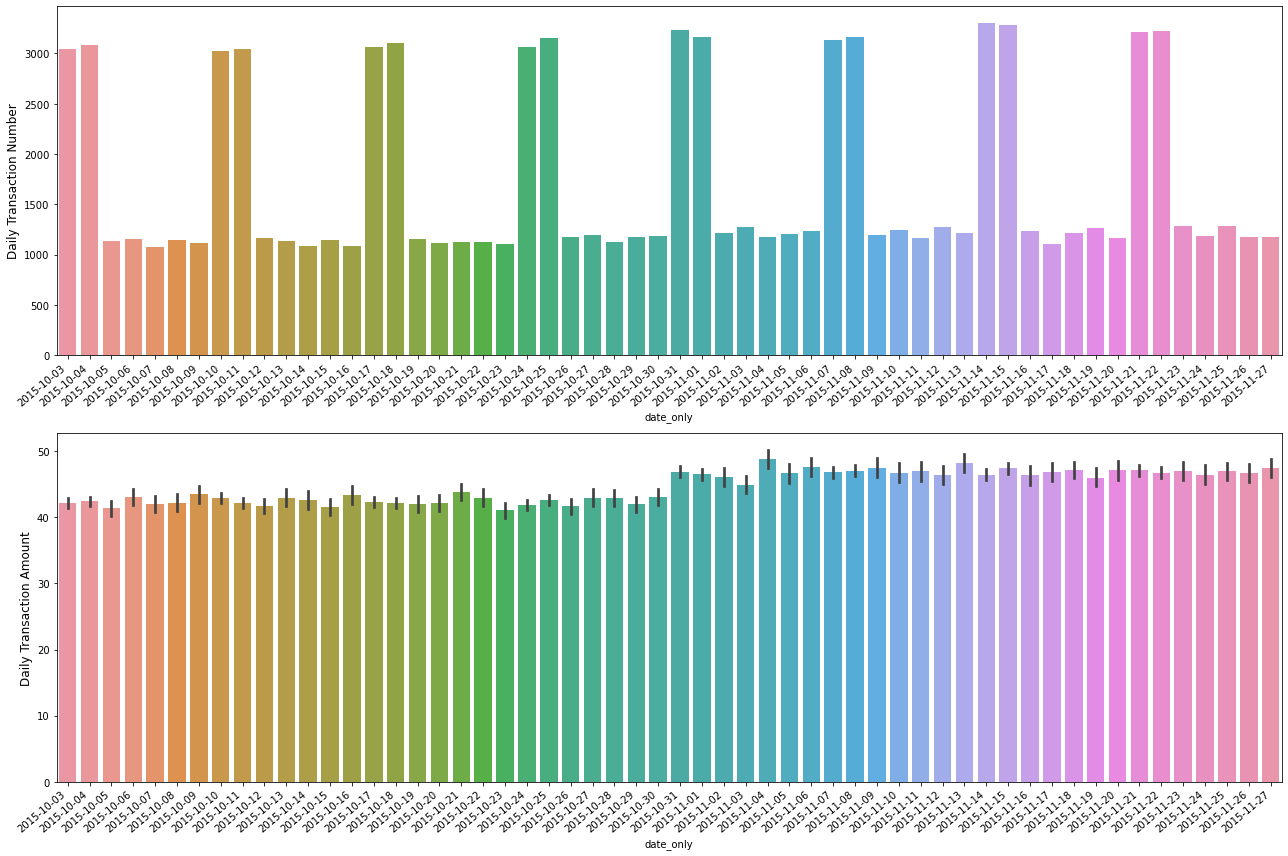

In [47]:
# daily money spent visualization
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))
sns.countplot(x='date_only', data=data, ax=ax[0])
ax[0].set_ylabel('Daily Transaction Number', fontsize=12)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")

sns.barplot(x='date_only', y='money_spent', data=data, ax=ax[1])
ax[1].set_ylabel('Daily Transaction Amount', fontsize=12)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

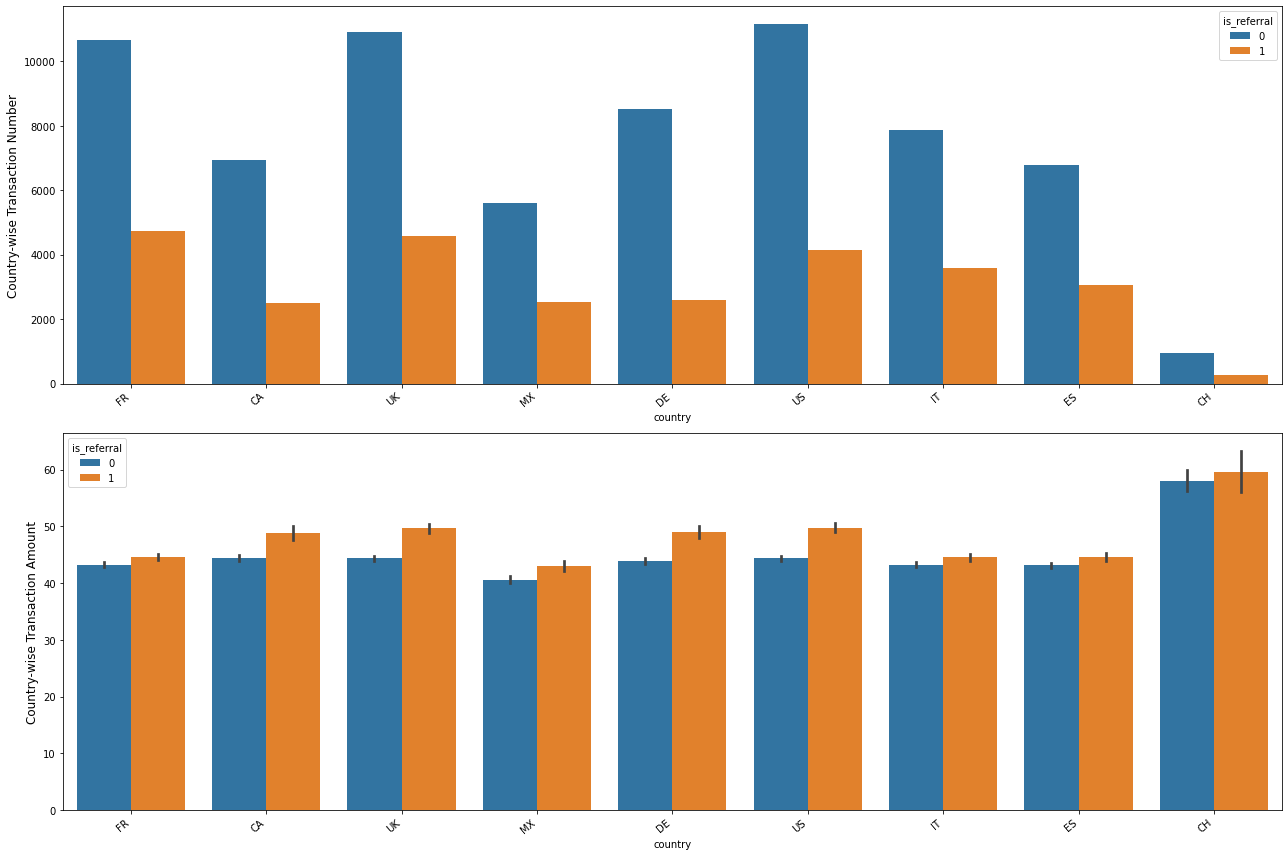

In [48]:
# daily money spent visualization
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))
sns.countplot(x='country', hue='is_referral',data=data, ax=ax[0])
ax[0].set_ylabel('Country-wise Transaction Number', fontsize=12)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")

sns.barplot(x='country', y='money_spent', hue='is_referral',data=data, ax=ax[1])
ax[1].set_ylabel('Country-wise Transaction Amount', fontsize=12)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

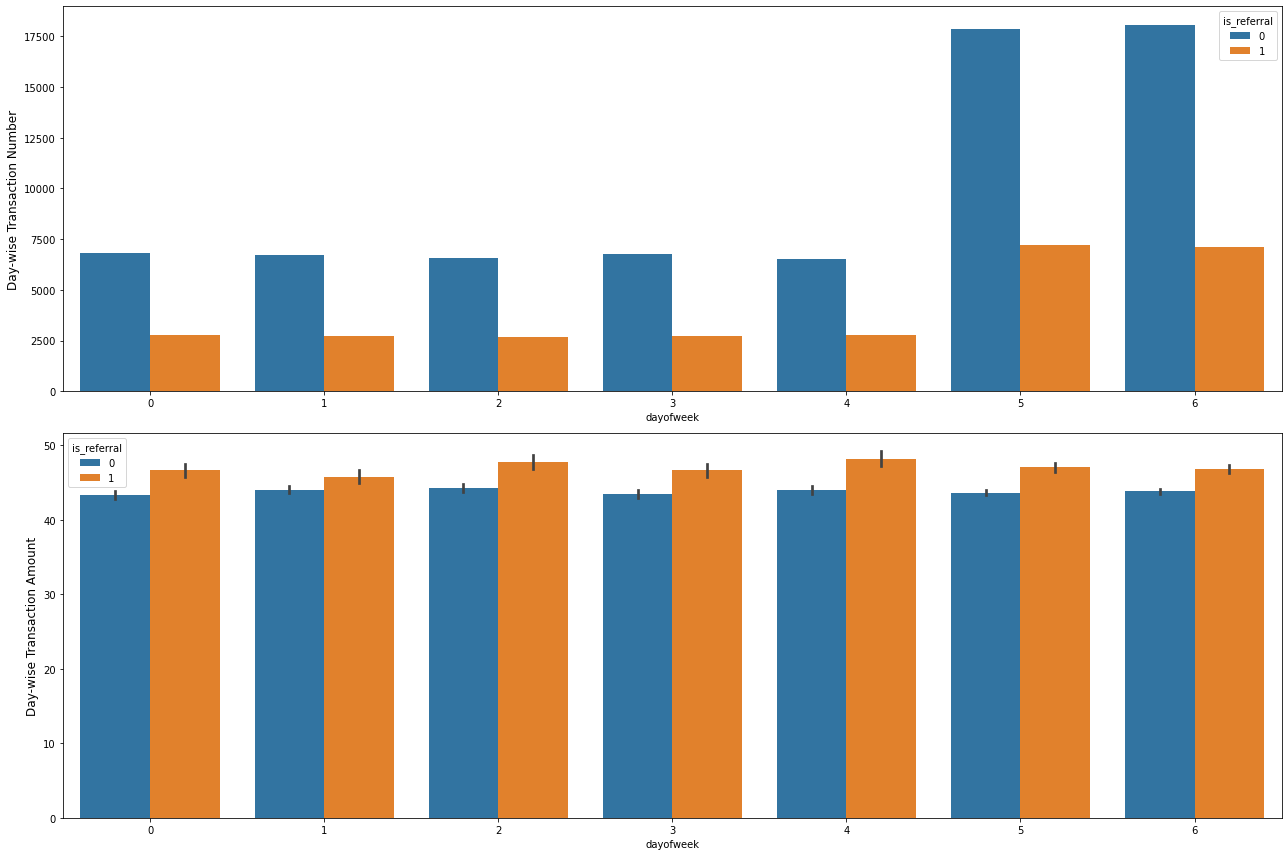

In [49]:
# daily money spent visualization (Monday is 0 and Sunday is 6)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))
sns.countplot(x='dayofweek', hue='is_referral', data=data, ax=ax[0])
ax[0].set_ylabel('Day-wise Transaction Number', fontsize=12)

sns.barplot(x='dayofweek', y='money_spent', hue='is_referral', data=data, ax=ax[1])
ax[1].set_ylabel('Day-wise Transaction Amount', fontsize=12)
plt.tight_layout()
plt.show()

In [101]:
def basic_stat(df):
    """ function to calculate statistics """
    num_purchase = len(df)
    money_spent = df['money_spent'].sum()
    unique_user = len(df['user_id'].unique())
    
    return pd.Series([num_purchase, money_spent, unique_user], 
                     index=['num_purchase', 'money_spent', 'unique_user'])

In [93]:
def daily_stat(data):
    grouped = data.groupby('date').apply(basic_stat).reset_index()
    ref = grouped[grouped['date'] < start_date]
    new = grouped[grouped['date'] >= start_date]
    
    names = ['num_purchase', 'money_spent', 'unique_user']
    vals = []
    for name in names:
        a = ref[name].values
        b = new[name].values
        # p-value should be one-side test
        p_val = ttest_ind(a, b, equal_var=False)[1] / 2
        vals.append(p_val)
        
    return pd.Series(vals)

In [108]:
def daily_stat2(data):
    grouped = data.groupby('date').apply(basic_stat).reset_index()
    ref = grouped[grouped['date'] < start_date]
    new = grouped[grouped['date'] >= start_date]
    
    names = ['num_purchase', 'money_spent', 'unique_user']
    vals = []
    for name in names:
        a = ref[name].mean()
        b = new[name].mean()
        p_val = ttest_ind(ref[name].values, new[name].values, equal_var=False)[1] / 2
        c =b-a
        vals.append({'mean_pre':a,'mean_post':b,'mean_diff':c,'pvalue':p_val})


        
    return pd.DataFrame(vals,index = names).loc[:,['mean_pre','mean_post','mean_diff','pvalue']]

In [109]:
daily_stat2(data)

,mean_pre,mean_post,mean_diff,pvalue
num_purchase,1690.750000,1785.714286,94.964286,0.348257
money_spent,71657.000000,83714.392857,12057.392857,0.135194
unique_user,1384.464286,1686.964286,302.500000,0.059545


In [110]:
data.groupby('country').apply(daily_stat2)

mean_pre     mean_post    mean_diff    pvalue
country                                                                
CA      num_purchase    177.142857    160.000000   -17.142857  0.233985
        money_spent    7468.428571   7880.428571   412.000000  0.351704
        unique_user     173.285714    159.178571   -14.107143  0.268256
CH      num_purchase     26.821429     17.071429    -9.750000  0.003072
        money_spent    1536.321429   1023.892857  -512.428571  0.006941
        unique_user      26.714286     17.071429    -9.642857  0.003142
DE      num_purchase    232.142857    164.035714   -68.107143  0.011798
        money_spent    9856.750000   8013.964286 -1842.785714  0.081459
        unique_user     224.964286    163.250000   -61.714286  0.015665
ES      num_purchase    156.607143    194.500000    37.892857  0.072638
        money_spent    6648.642857   8660.571429  2011.928571  0.037522
        unique_user     153.392857    193.214286    39.821429  0.057954
FR      num_purchase    244.142857    305.714286    61.571429  0.058996
        money_spent   10385.250000  13635.000000  3249.750000  0.031843
        unique_user     236.500000    302.535714    66.035714  0.041124
IT      num_purchase    180.857143    227.928571    47.071429  0.057454
        money_spent    7651.571429  10193.428571  2541.857143  0.025730
        unique_user     176.535714    226.107143    49.571429  0.043911
MX      num_purchase    126.464286    164.000000    37.535714  0.032430
        money_spent    4975.464286   7033.214286  2057.750000  0.009670
        unique_user     124.392857    163.107143    38.714286  0.026203
UK      num_purchase    264.285714    289.035714    24.750000  0.261183
        money_spent   11213.535714  14196.428571  2982.892857  0.048490
        unique_user     255.571429    286.321429    30.750000  0.204398
US      num_purchase    282.285714    263.428571   -18.857143  0.307801
        money_spent   11921.035714  13077.464286  1156.428571  0.248874
        unique_user     273.178571    261.107143   -12.071429  0.368860

In [82]:
daily_stat(data)

num_purchase    0.348257
money_spent     0.135194
unique_user     0.059545
dtype: float64

In [83]:
data.groupby('country').apply(daily_stat).reset_index()

,country,num_purchase,money_spent,unique_user
0,CA,0.233985,0.351704,0.268256
1,CH,0.003072,0.006941,0.003142
2,DE,0.011798,0.081459,0.015665
3,ES,0.072638,0.037522,0.057954
4,FR,0.058996,0.031843,0.041124
5,IT,0.057454,0.025730,0.043911
6,MX,0.032430,0.009670,0.026203
7,UK,0.261183,0.048490,0.204398
8,US,0.307801,0.248874,0.368860


In [112]:
data.groupby('country').apply(daily_stat2).xs('money_spent',level=1).sort_values(by='pvalue')

,mean_pre,mean_post,mean_diff,pvalue
country,,,,
CH,1536.321429,1023.892857,-512.428571,0.006941
MX,4975.464286,7033.214286,2057.750000,0.009670
IT,7651.571429,10193.428571,2541.857143,0.025730
FR,10385.250000,13635.000000,3249.750000,0.031843
ES,6648.642857,8660.571429,2011.928571,0.037522
UK,11213.535714,14196.428571,2982.892857,0.048490
DE,9856.750000,8013.964286,-1842.785714,0.081459
US,11921.035714,13077.464286,1156.428571,0.248874
CA,7468.428571,7880.428571,412.000000,0.351704


In [84]:
data.groupby('dayofweek').apply(daily_stat).reset_index()

,dayofweek,num_purchase,money_spent,unique_user
0,0,0.012484,0.000368,0.000665
1,1,0.156965,0.007701,0.008802
2,2,0.009713,0.000301,0.001270
3,3,0.016584,0.000675,0.002578
4,4,0.016875,0.000595,0.000683
5,5,0.006828,0.000107,0.000125
6,6,0.011717,0.000133,0.000012


## Questions

### Question 1

According to the analysis above, the program doesn't seem have significant impacts to the whole company as a whole.

However, based on each country, I find the program has different impact on different country:

* the program fails in CH and DE, it significantly decrease the sales in these two countries.
* the program succeeds in 'MX','IT','FR','ES', it significantly increase the sales.
* the program doesn't seem have any significant effect on UK,CA,US, especially on CA and US.

### Question 2
* first I suggest perform more accurate A/B test (see question 3's answer) and collect more data, to study the impact of the program
* since the program has different impact in different country, I suggest studying the reason of such difference. for example, does the program has any cultural conflicts in CH and DE?

### Question 3
This approach isn't an accurate A/B test. "User Referral" program isn't the only difference between control group and test group. for example, there may be some special holiday after Oct 31 in some country. or just because the weather get colder after Oct 31, people's requirement on some goods are increased.

To get more accurate impact of the program, we need to perform a more careful A/B test. for example:

* during the same peroid of time
* randomly split the customers into two groups, and let only one group know the User Referral program.
* run the experiment some time, then perform the t-test to see whether some 'sale performance index' (e.g., daily spent, daily customers, daily transactions) have significant changes or not.